In [1]:
import torch
from torch import nn  #nn contains all PyTorch's building blocks for neural network
import matplotlib.pyplot as plt


## Creating a Simple Dataset

In [2]:
weight = 0.6
bias = 0.4


start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.4000],
         [0.4120],
         [0.4240],
         [0.4360],
         [0.4480],
         [0.4600],
         [0.4720],
         [0.4840],
         [0.4960],
         [0.5080]]))

In [3]:
len(X), len(y)

(50, 50)

## Splitting the Data into Training and Test Sets

In [4]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

## Visualizing our Data

In [5]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                    test_labels=y_test,
                    predictions=None):

  # Plotting Train and Test Data and comparing Predictions
  plt.figure(figsize=(10,7))

  # Plotting Training Data in Blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  # Plotting Test Data in Green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend()

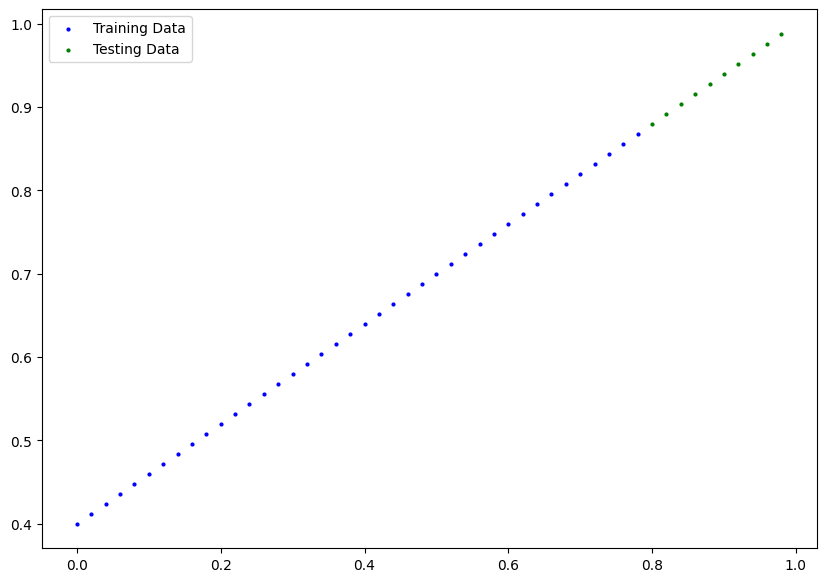

In [6]:
plot_predictions()

## Building First PyTorch Model

- `nn.Module` is Base Class for all neural network Modules

- Your models should also subclass this class

- " -> torch.Tensor" is a type hint. It tells the reader "x" should be `torch.Tensor` and the result will also be `torch.Tensor`

- `requires_grad = True` means PyTorch will track the gradients of this specific Parameter for use with `torch.autograd` and gradient descent.

- Any subclass of `nn.Modules` needs to override `forward()` method means when using `nn.Modules`, we need to define `forward()` method.

In [7]:
# Creating Linear Regression Model Class
class LinearRegressionModel(nn.Module): # Almost everything in PyTorch inherits from nn.Module
  def __init__(self):
    super().__init__()

    # Starting with a Random Value (1) and trying to adjust it to the ideal weight and bias
    # By Default, requires_grad = True and dtype is Float, but still defined below explicitly
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  # Forward method to define the Computation in the Model
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias # Linear Regression Formula

## Checking the contents of PyTorch model

In [8]:
# Creating the Random Seed
torch.manual_seed(42)

# Creating the instance of the LR Model Class
model_0 = LinearRegressionModel()

# Checking out the Parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# Listing the Named Parameters for no confusion
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Making Predictions

In [15]:
# This method of predictions keeps the Gradient tracking on.
y_preds = model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [12]:
# This inference mode turns off the gradient tracking.
with torch.inference_mode():
  y_preds = model_0(X_test)

'''
You can also use torch.no_grad(), however torch.inference_mode() is more common

with torch.no_grad():
  y_preds = model_0(X_test)

'''

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [13]:
y_test

tensor([[0.8800],
        [0.8920],
        [0.9040],
        [0.9160],
        [0.9280],
        [0.9400],
        [0.9520],
        [0.9640],
        [0.9760],
        [0.9880]])

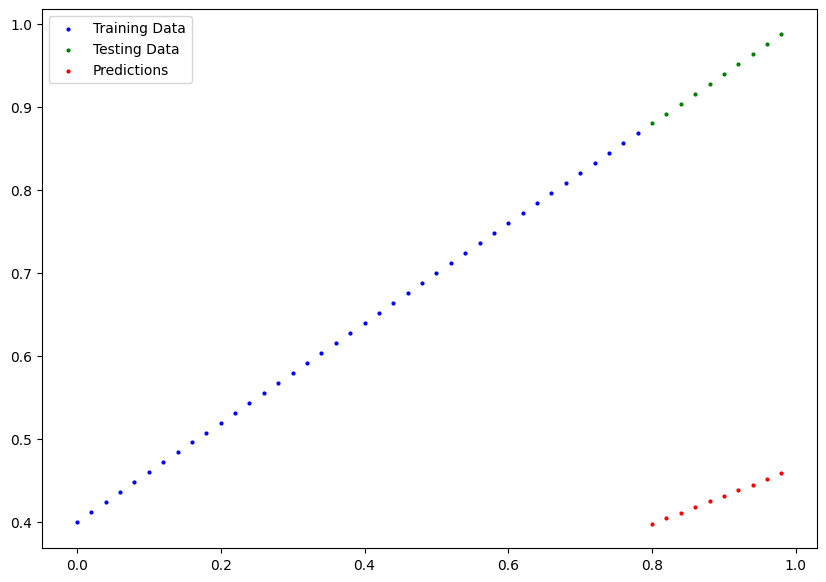

In [14]:
plot_predictions(predictions=y_preds)